# 1/ Import Packages

In [1]:
import pandas as pd
import numpy as np

# 2/ Import Data

In [2]:
train = pd.read_csv('../data/Employee Attrition/train.csv')

# 3/ Check Meta Data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [7]:
train.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1677.0,NaN,NaN,NaN,838.0,484.252517,0.0,419.0,838.0,1257.0,1676.0
Age,1677.0,NaN,NaN,NaN,36.036971,8.507112,18.0,30.0,35.0,41.0,60.0
BusinessTravel,1677,3,Travel_Rarely,1290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1677.0,NaN,NaN,NaN,892.749553,374.496259,107.0,589.0,890.0,1223.0,3921.0
Department,1677,3,Research & Development,1167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1677.0,NaN,NaN,NaN,8.683959,7.826143,1.0,2.0,7.0,12.0,29.0
Education,1677.0,NaN,NaN,NaN,2.937984,1.039078,1.0,2.0,3.0,4.0,15.0
EducationField,1677,6,Life Sciences,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1677.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EnvironmentSatisfaction,1677.0,NaN,NaN,NaN,2.757901,1.086835,1.0,2.0,3.0,4.0,4.0


# 4/ Target

<AxesSubplot:>

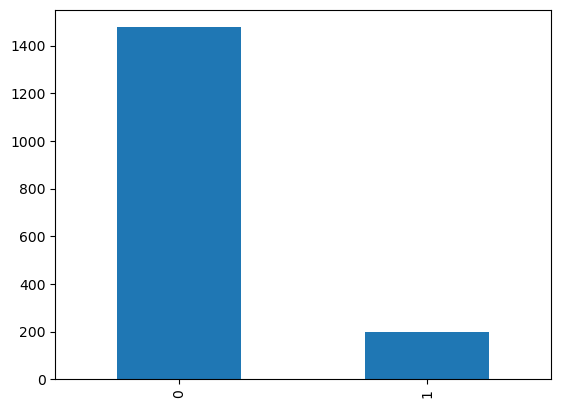

In [10]:
train.Attrition.value_counts().plot.bar()

# 5/ Divide - Categorical and Numerical

In [16]:
# train.columns.tolist()

In [22]:
features_numerical = train.drop(['id','Attrition'], axis = 1).select_dtypes(include = 'number').columns.tolist()
features_numerical

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [23]:
features_categorical = train.drop(['id','Attrition'], axis = 1).select_dtypes(exclude = 'number').columns.tolist()
features_categorical

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

# 6/ Get Unique Features

In [25]:
train[features_categorical].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [26]:
train[features_numerical].nunique()

Age                          43
DailyRate                   625
DistanceFromHome             29
Education                     6
EmployeeCount                 1
EnvironmentSatisfaction       4
HourlyRate                   71
JobInvolvement                4
JobLevel                      6
JobSatisfaction               4
MonthlyIncome               895
MonthlyRate                 903
NumCompaniesWorked           10
PercentSalaryHike            15
PerformanceRating             2
RelationshipSatisfaction      4
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            41
TrainingTimesLastYear         7
WorkLifeBalance               4
YearsAtCompany               34
YearsInCurrentRole           19
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

# More Categorical

In [27]:
features_categorical

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

## Get One Categorical Summary

In [43]:
categorical_unique_count = pd.DataFrame(train['BusinessTravel'].value_counts()).reset_index()
categorical_unique_count.columns = ['Category', 'Count']
categorical_unique_count['Column_Name'] = 'BusinessTravel'
categorical_unique_count

,Category,Count,Column_Name
0,Travel_Rarely,1290,BusinessTravel
1,Travel_Frequently,261,BusinessTravel
2,Non-Travel,126,BusinessTravel


## Loops

In [45]:
for sel_col in features_categorical:
    categorical_unique_count = pd.DataFrame(train[sel_col].value_counts()).reset_index()
    categorical_unique_count.columns = ['Category', 'Count']
    categorical_unique_count['Column_Name'] = sel_col
    print(categorical_unique_count)

            Category  Count     Column_Name
0      Travel_Rarely   1290  BusinessTravel
1  Travel_Frequently    261  BusinessTravel
2         Non-Travel    126  BusinessTravel
                 Category  Count Column_Name
0  Research & Development   1167  Department
1                   Sales    471  Department
2         Human Resources     39  Department
           Category  Count     Column_Name
0     Life Sciences    775  EducationField
1           Medical    549  EducationField
2         Marketing    152  EducationField
3  Technical Degree    106  EducationField
4             Other     82  EducationField
5   Human Resources     13  EducationField
  Category  Count Column_Name
0     Male   1064      Gender
1   Female    613      Gender
                    Category  Count Column_Name
0            Sales Executive    355     JobRole
1         Research Scientist    344     JobRole
2      Laboratory Technician    334     JobRole
3     Manufacturing Director    196     JobRole
4  Healthcare

## Functions

In [50]:
def get_one_category_unique_count(sel_col):
    categorical_unique_count = pd.DataFrame(train[sel_col].value_counts()).reset_index()
    categorical_unique_count.columns = ['Category', 'Count']
    categorical_unique_count['Column_Name'] = sel_col
    return categorical_unique_count

In [52]:
df1 = get_one_category_unique_count('BusinessTravel')
df2 = get_one_category_unique_count('Department')

In [54]:
pd.concat([df1, df2])

,Category,Count,Column_Name
0,Travel_Rarely,1290,BusinessTravel
1,Travel_Frequently,261,BusinessTravel
2,Non-Travel,126,BusinessTravel
0,Research & Development,1167,Department
1,Sales,471,Department
2,Human Resources,39,Department


## Final Get Summary

In [55]:
df = pd.DataFrame()

In [59]:
def get_all_categorical_summary(df):
    for sel_col in features_categorical:
        df_get1_summary = get_one_category_unique_count(sel_col)
        df = pd.concat([df, df_get1_summary])
    
    return df

In [60]:
get_all_categorical_summary(df)

,Category,Count,Column_Name
0,Travel_Rarely,1290,BusinessTravel
1,Travel_Frequently,261,BusinessTravel
2,Non-Travel,126,BusinessTravel
0,Research & Development,1167,Department
1,Sales,471,Department
2,Human Resources,39,Department
0,Life Sciences,775,EducationField
1,Medical,549,EducationField
2,Marketing,152,EducationField
3,Technical Degree,106,EducationField


## Next Steps
- Data Type Conversion
- Handling Dates
- Handling Numerical (Transformation, Outlier)
- Feature Engineering
- Feature Selection